# Predicting Value of a jeapordy game question

First we will be glancing through the dataset and do some exploratory analysis

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

In [387]:
der = r'C:\Users\harsh\Downloads\kaggle-jeoperdy\JEOPARDY_CSV.csv'
import pandas as pd
import numpy as np

In [315]:
df = pd.read_csv(der)

In [378]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,Value
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,200


In [200]:
df.describe()

,Show Number
count,216930.000000
mean,4264.238519
std,1386.296335
min,1.000000
25%,3349.000000
50%,4490.000000
75%,5393.000000
max,6300.000000


In [196]:
#Looking at the columns
df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value', ' Question', ' Answer'], dtype='object')

In [197]:
#drop rows with NaN values if any
df.dropna()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,2006-05-11,Double Jeopardy!,RIDDLE ME THIS,$2000,This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,2006-05-11,Double Jeopardy!,"""T"" BIRDS",$2000,In North America this term is properly applied...,a titmouse
216927,4999,2006-05-11,Double Jeopardy!,AUTHORS IN THEIR YOUTH,$2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,2006-05-11,Double Jeopardy!,QUOTATIONS,$2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [327]:
# Some of the values in " Value" column are marked as none, a simple way to remove that is:
none_money =df[" Value"] == "None"
none_array = df[none_money].index
none_array

Int64Index([    55,    116,    174,    235,    296,    357,    418,    474,    535,    594,
            ...
            216384, 216445, 216506, 216567, 216628, 216686, 216746, 216807, 216868, 216929], dtype='int64', length=3634)

In [328]:
df.drop(none_array,inplace = True)
print(df.shape)
df.head()

(213296, 8)


,Show Number,Air Date,Round,Category,Value,Question,Answer,Value
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,800
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,800
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,800
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,800
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,800


In [409]:
# Now in df[" Value"], we have $ signs and 
df["Value"] = df[" Value"].replace('[\$\,\.]',"",regex=True).astype(int)

In [410]:
df["Value"].value_counts()

400      42244
800      31860
200      30455
1000     21640
600      20377
2000     12829
1200     11772
1600     11040
100       9029
500       9016
300       8663
3000       769
1500       546
4000       349
2500       232
5000       231
1400       228
700        203
1800       182
2200       147
2400       127
900        114
6000        85
2600        83
1300        75
2800        69
1100        63
3600        56
3200        53
3400        51
3500        49
1700        44
4200        43
7000        39
3800        37
1900        28
5200        25
4800        24
2300        23
10000       22
2100        22
4600        21
8000        20
2700        18
4500        16
4400        15
5600        13
5400        12
6400        11
3100        11
5800        10
5            9
3300         9
9000         8
7800         8
6600         8
5500         7
3700         7
6200         7
10800        6
2900         6
3900         5
7200         5
250          5
8200         4
7500         4
7400      

In [397]:
df["Show Number"].value_counts()

2047    60
5169    60
3890    60
5937    60
5809    60
        ..
2757    30
6300    30
6087    30
3022    16
1178    12
Name: Show Number, Length: 3640, dtype: int64

In [399]:
df[" Round"].value_counts()

Jeopardy!           107384
Double Jeopardy!    105912
Name:  Round, dtype: int64

In [398]:
# for us to be able to see all of the values of pandas.series object rather than viewing a truncated version , we can try
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.groupby(" Category").size().sort_values(ascending=False))


 Category
BEFORE & AFTER                                       547
SCIENCE                                              513
LITERATURE                                           486
POTPOURRI                                            401
AMERICAN HISTORY                                     401
WORLD HISTORY                                        366
HISTORY                                              349
COLLEGES & UNIVERSITIES                              345
WORD ORIGINS                                         337
SPORTS                                               334
BODIES OF WATER                                      321
U.S. CITIES                                          320
WORLD GEOGRAPHY                                      319
ANIMALS                                              312
U.S. GEOGRAPHY                                       291
RELIGION                                             289
BUSINESS & INDUSTRY                                  288
OPERA                

In [ ]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
pd.set_option('display.expand_frame_repr', False)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df[" Category"].value_counts())

In [ ]:
df[" Category"].shape

# Checking for relationship between categories of questions and values

In [341]:
groupdf = df.groupby(" Category")

In [342]:
gdf_ = groupdf.size().sort_values(ascending=False)

In [344]:
# to view the prominent categories
# considering only the categories which have appeared more than 400 times in the entire dataset
gdf_ = gdf_[gdf_ > 400]
gdf_.index

Index(['BEFORE & AFTER', 'SCIENCE', 'LITERATURE', 'POTPOURRI', 'AMERICAN HISTORY'], dtype='object', name=' Category')

In [345]:
type(gdf_)

pandas.core.series.Series

In [346]:
gdf_array = gdf_.index.to_numpy()

In [347]:
print(gdf_array)
print(gdf_array.shape)

['BEFORE & AFTER' 'SCIENCE' 'LITERATURE' 'POTPOURRI' 'AMERICAN HISTORY']
(5,)


In [401]:
# df400 contains all entries for which the category is such that it has appeared more than 400 times
df400 = df[df[" Category"].isin(gdf_array)]

In [402]:
df400.shape

(2348, 9)

In [403]:
df400

,Show Number,Air Date,Round,Category,Value,Question,Answer,Value,ValueBins
268,4931,2006-02-06,Double Jeopardy!,SCIENCE,$400,"At sea level at 70 degrees this travels 1,129 ...",sound,400,400
274,4931,2006-02-06,Double Jeopardy!,SCIENCE,$800,"The largest tree, the General Sherman in Calif...",a sequoia,800,800
280,4931,2006-02-06,Double Jeopardy!,SCIENCE,$1200,"(<a href=""http://www.j-archive.com/media/2006-...",strain,1200,1000
286,4931,2006-02-06,Double Jeopardy!,SCIENCE,$1600,6 elements once known as inert gases are now k...,noble gases,1600,2000
292,4931,2006-02-06,Double Jeopardy!,SCIENCE,$2000,"(<a href=""http://www.j-archive.com/media/2006-...",the caudal region,2000,2000
...,...,...,...,...,...,...,...,...,...
216598,2046,1993-06-28,Double Jeopardy!,AMERICAN HISTORY,$200,This 1848 event made the California trail the ...,gold strike,200,200
216604,2046,1993-06-28,Double Jeopardy!,AMERICAN HISTORY,$400,"Before becoming chief justice in 1789, he was ...",John Jay,400,400
216610,2046,1993-06-28,Double Jeopardy!,AMERICAN HISTORY,$600,In 1928 this Republican campaigned for preside...,Hoover,600,600
216616,2046,1993-06-28,Double Jeopardy!,AMERICAN HISTORY,$800,Judge John T. Raulston presided over this Dayt...,the Scopes trial,800,800


<AxesSubplot:ylabel='Value'>

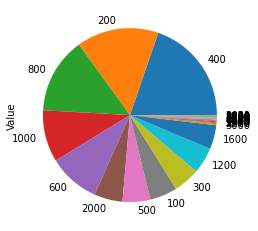

In [404]:
#for significant categories,we can visualise the different values as well using a pie chart
df400["Value"].value_counts().plot(kind ="pie")

# Checking for relationship between  question round and values

<AxesSubplot:>

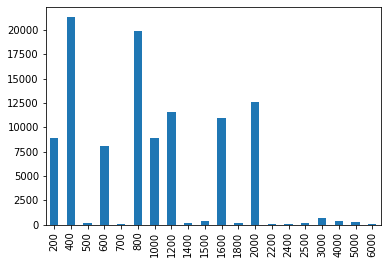

In [335]:
# bar graph for 20 most significant values of questions appearing in round = double jeapordy 
df[df[" Round"]=="Double Jeopardy!"]["Value"].value_counts()[0:20].sort_index(ascending = True).plot(kind = "bar")

<AxesSubplot:>

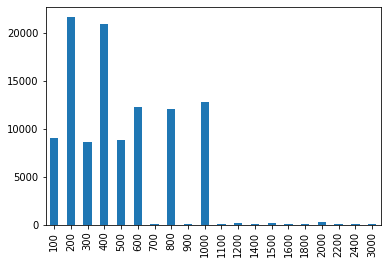

In [417]:
# bar graph for 20 most significant values of questions appearing in round = double jeapordy 
df[df[" Round"]=="Jeopardy!"]["Value"].value_counts()[0:20].sort_index(ascending = True).plot(kind = "bar")

<AxesSubplot:xlabel='Value'>

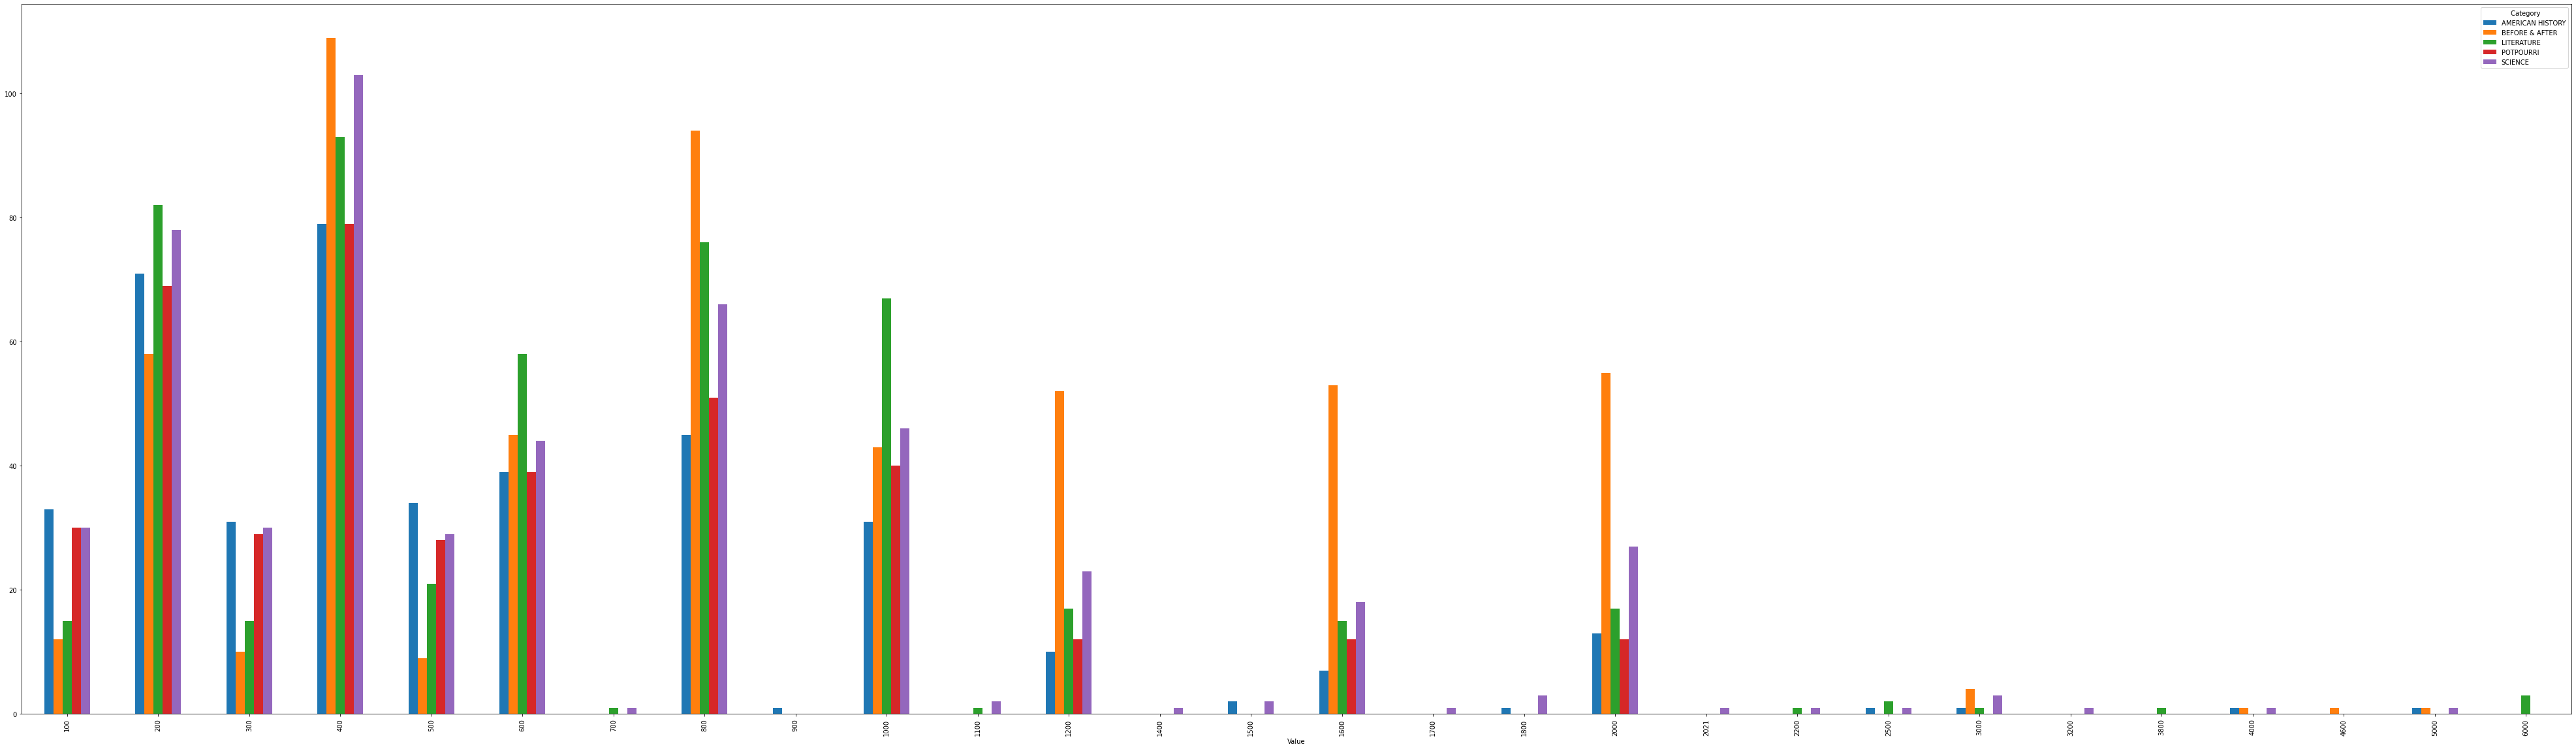

In [367]:
df400.groupby(["Value"," Category"]).size().unstack(" Category").plot(kind = "bar",figsize=(70,20))

Since no relationship can be directly established betwenn categories or rounds with value of the question, another approach can be using the question itself to predict the value using NLP's Bag of Words


# Bag Of Words Approach

In [382]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [388]:
def binning(value):
    if value < 1000:
        return np.round(value, -2)
    elif value < 10000:
        return np.round(value, -3)
    else:
        return np.round(value, -4)

df['ValueBins'] = df['Value'].apply(binning)

In [389]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [390]:
print(train.shape,test.shape)

(170636, 9) (42660, 9)


In [391]:
%%time
bow = CountVectorizer(stop_words='english', max_features=2000)
bow.fit(df[' Question'])

Wall time: 14.6 s


CountVectorizer(max_features=2000, stop_words='english')

In [392]:
train_labels = train['ValueBins']
train_questions = train[ ' Question']
test_labels = test[ 'ValueBins']
test_questions = test[ ' Question']

In [393]:
X_train = bow.transform(train_questions)
X_test = bow.transform(test_questions)

y_train = train_labels
y_test = test_labels

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (170636, 2000)
Shape of X_test: (42660, 2000)
Shape of y_train: (170636,)
Shape of y_test: (42660,)


In [394]:
%%time
lr = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=200)
lr.fit(X_train, y_train)

Wall time: 2min 49s


C:\Users\harsh\Anaconda3\envs\deepln\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(max_iter=200, multi_class='multinomial', solver='saga')

In [395]:
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\harsh\Anaconda3\envs\deepln\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
         100       0.07      0.00      0.01      1840
         200       0.18      0.14      0.16      6035
         300       0.08      0.00      0.01      1740
         400       0.21      0.58      0.31      8500
         500       0.08      0.01      0.01      1852
         600       0.09      0.01      0.02      4045
         700       0.00      0.00      0.00        50
         800       0.16      0.10      0.12      6363
         900       0.00      0.00      0.00        15
        1000       0.19      0.20      0.19      6745
        2000       0.18      0.09      0.12      5043
        3000       1.00      0.01      0.01       196
        4000       0.00      0.00      0.00       108
        5000       0.00      0.00      0.00        67
        6000       0.00      0.00      0.00        28
        7000       0.00      0.00      0.00        11
        8000       0.00    

There isnt much predictive power held by words contained in a question to the value of the question asked either, as we can see BOW approach is also unable to give a good accuracy.